In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
from brian2 import *
import brian2
from IPython.display import Image
from scipy.optimize import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import quantities as u
import pickle

HI0


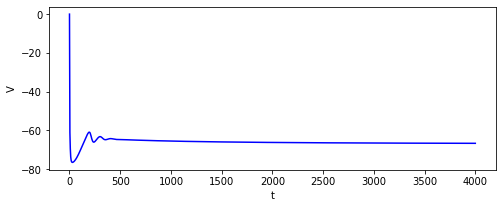

HI0.7


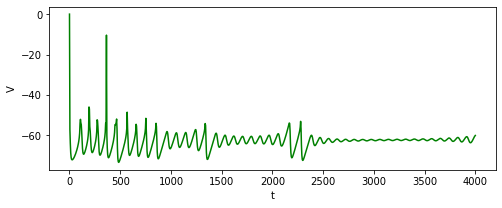

HI1


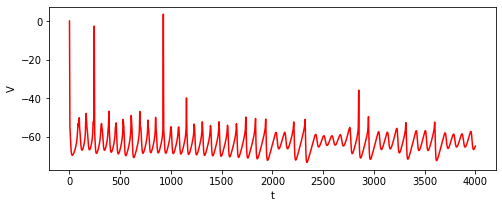

HI1.5


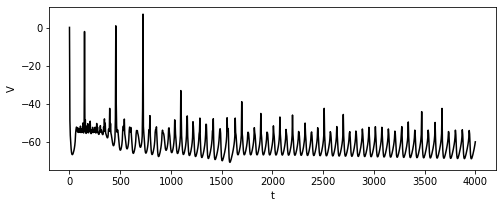

HI1.6


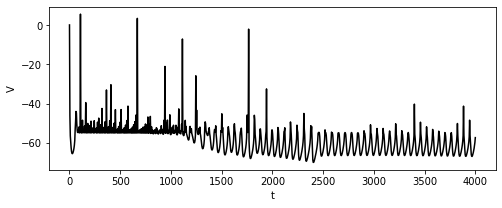

In [2]:
def dz_dt(z, t, I_app):
    
    C = 1 #microF
    #tau_0 = 10 #ms
    g_L = 0.1 #mS
    g_Na = 52
    g_K = 20
    g_Nap = 0.1
    g_Ks = 14
    E_L = -60
    E_Na = 55
    E_K = -90
    phi_n = 28.57
    phi_h = 28.57
    phi_h1 = 1
    phi_h2 = 1
    phi_mm = 1
    
    sigma = -1

    alpha_m = -0.1 * (z[0] + 30 - sigma) / (exp(-0.1*(z[0] + 30 - sigma)) - 1)
    beta_m = 4 * exp(-(z[0] + 55 - sigma)/18)
    m_x = alpha_m / (alpha_m + beta_m) 
    alpha_h = 0.07 * exp(-(z[0] + 44 - sigma)/20)
    beta_h = 1 / (exp(-0.1 * (z[0] + 14 - sigma)) + 1)
    
    I_Na = g_Na * (m_x ** 3) * z[1] * (z[0] - E_Na)

    alpha_n = -0.01 * (z[0] + 34 - sigma) / (exp(-0.1 * (z[0] + 34 - sigma)) - 1)
    beta_n = 0.125 * exp(-(z[0] + 44 - sigma) / 80)
    I_K = g_K * (z[2] ** 4) * (z[0] - E_K)
    
    m_inf = 1/(1 + exp(-(z[0] + 51)/5))
    I_Nap = g_Nap * m_inf * (z[0] - E_Na)
    
    rho = 0.6
    h1_inf = 1/(1 + exp((z[0] + 65)/6.6))
    h2_inf = 1/(1 + exp((z[0] + 65)/6.6))
    tau_h1 = 200 + 220 / (1 + exp(-(z[0] + 71.6)/6.85))
    tau_h2 = 200 + 3200 / (1 + exp(-(z[0] + 63.6)/4))
    mm_inf = 1/(1 + exp(-(z[0] + 34)/6.5))
    tau_mm = 50 #ms
    I_Ks = g_Ks * z[5] * (rho * z[3] + (1 - rho) * z[4]) * (z[0] - E_K)

    dV_dt = (-g_L * (z[0] - E_L) - I_Nap - I_Ks - I_Na - I_K + I_app) / C
    dh_dt = phi_h * (alpha_h * (1 - z[1]) - beta_h * z[1])
    dn_dt = phi_n * (alpha_n * (1 - z[2]) - beta_n * z[2])
    dh1_dt = phi_h1 * (h1_inf - z[3])/tau_h1
    dh2_dt = phi_h2 * (h2_inf - z[4])/tau_h2
    dmm_dt = phi_mm * (mm_inf - z[5])/tau_mm
    
    return [dV_dt, dh_dt, dn_dt, dh1_dt, dh2_dt, dmm_dt]

print("HI0")

t = np.linspace(0, 4000, 1000)

plt.figure(figsize=(8,3))
ret0 = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t, args=(0,))
V0 = ret0[:, 0]
plt.plot(t, V0, color='b')
plt.xlabel("t")
plt.ylabel("V")
plt.show()

print("HI0.7")

plt.figure(figsize=(8,3))
ret07 = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t, args=(0.7,))
V07 = ret07[:, 0]
plt.plot(t, V07, color='g')
plt.xlabel("t")
plt.ylabel("V")
plt.show()

print("HI1")

plt.figure(figsize=(8,3))
ret1 = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t, args=(1,))
V1 = ret1[:, 0]
plt.plot(t, V1, color='r')
plt.xlabel("t")
plt.ylabel("V")
plt.show()

print("HI1.5")

plt.figure(figsize=(8,3))
ret15 = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t, args=(1.5,))
V15 = ret15[:, 0]
plt.plot(t, V15, color='black')
plt.xlabel("t")
plt.ylabel("V")
plt.show()

print("HI1.6")

plt.figure(figsize=(8,3))
ret16 = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t, args=(1.6,))
V16 = ret16[:, 0]
plt.plot(t, V16, color='black')
plt.xlabel("t")
plt.ylabel("V")
plt.show()

In [3]:
pickle.dump(ret0, open("ret0_Fig3c.pk", 'wb'))
pickle.dump(ret07, open("ret07_Fig3c.pk", 'wb'))
pickle.dump(ret1, open("ret1_Fig3c.pk", 'wb'))
pickle.dump(ret15, open("ret15_Fig3c.pk", 'wb'))
pickle.dump(ret16, open("ret16_Fig3c.pk", 'wb'))